In [1]:
import numpy as ny
from matplotlib import pyplot as py
%matplotlib inline

In [2]:
py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 16

In [3]:
#set parameters

L = 1.0 # length of road
nx = 51 # number of locations on rod
dx = L / (nx - 1) # distance between points
alpha = 1.22e-3 # thermal diffusivity of rod

# define locations of rod
x = ny.linspace(0.0, L, num=nx)

# set the initial temp along rod
T0 = ny.zeros(nx)
T0[0] = 100.0

In [4]:
def ftcs(T0, nt, dt, dx, alpha):
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] + sigma * (T[:-2] -2 * T[1:-1] + T[2:])
        T[0] = 100.0
        T[-1] = 0.0
    return T

In [8]:
nt = 1000
sigma = 0.5
dt = sigma*dx**2/alpha

T = ftcs(T0, nt, dt, dx, alpha)

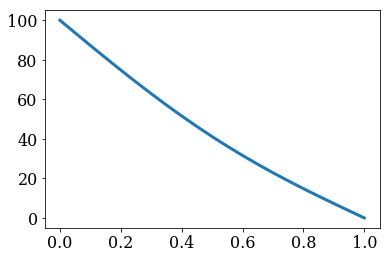

In [9]:
py.plot(x, T, lw=3)

Something is messed up, it exploded !!!!

it is shown in our criteria that our sigma must be equal or less than 0.5

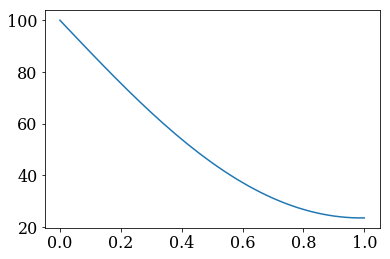

In [10]:
def ftcs_mixed_bcs(T0, nt, dt, dx, alpha):
    
    T = T0.copy()
    sigma = alpha * dt / dx**2
    for n in range(nt):
        T[1:-1] = T[1:-1] + sigma * (T[:-2] - 2 * T[1:-1] + T[2:])
        # neumann condition with a zero-gradiant value
        T[-1] = T[-2]
    return T

T = ftcs_mixed_bcs(T0, nt, dt, dx, alpha)

py.plot(x, T)